# Convnet for MNIST Handwritten Image Recognition in Keras (Machine Learning Mastery)

Here is an exapmle of using Convnets to recognize hand written digits.<br>
The purpose of this notebook is just to get a feel of handwriting recognition with MNIST dataset.<br>
As a result of this the entire code for the ConvNet has been taken from the below link:-<br>
Link:- https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

Here we import all the necessary python packages.

In [1]:
# Larger CNN for the MNIST Dataset
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
from matplotlib.pyplot import imshow
from PIL import Image

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

Load and reshape the MNIST data

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Lets display a random image and its label

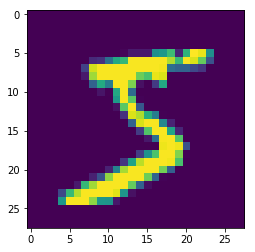

In [5]:
first_image = X_train[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels)
plt.show()

In [6]:
print(np.argmax(y_train[0]))

5


Here we build and train the model

In [7]:
# define the larger model
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [8]:
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 591s 10ms/step - loss: 0.3901 - acc: 0.8803 - val_loss: 0.0969 - val_acc: 0.9690
Epoch 2/10
60000/60000 [==============================] - 586s 10ms/step - loss: 0.0951 - acc: 0.9710 - val_loss: 0.0583 - val_acc: 0.9810
Epoch 3/10
60000/60000 [==============================] - 587s 10ms/step - loss: 0.0688 - acc: 0.9790 - val_loss: 0.0372 - val_acc: 0.9880
Epoch 4/10
60000/60000 [==============================] - 585s 10ms/step - loss: 0.0559 - acc: 0.9830 - val_loss: 0.0311 - val_acc: 0.9904
Epoch 5/10
60000/60000 [==============================] - 589s 10ms/step - loss: 0.0477 - acc: 0.9850 - val_loss: 0.0299 - val_acc: 0.9903
Epoch 6/10
60000/60000 [==============================] - 589s 10ms/step - loss: 0.0431 - acc: 0.9862 - val_loss: 0.0289 - val_acc: 0.9910
Epoch 7/10
60000/60000 [==============================] - 589s 10ms/step - loss: 0.0382 - acc: 0.9878 - val_loss: 0.

Lets test the prediction on a random image

In [9]:
Xnew=X_test[100]
Xnew = Xnew.reshape(1, 1, 28, 28).astype('float32')
print(np.shape(Xnew))
# make a prediction
ynew = model.predict(Xnew)

(1, 1, 28, 28)


In [10]:
print(np.argmax(ynew))

6


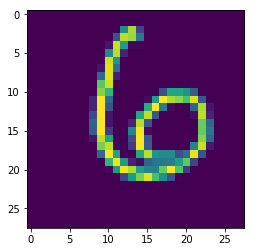

In [11]:
first_image = Xnew
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels)
plt.show()

Here we see image is 6 and predicted value alos is 6

Lets try our own example now.<br>
The below images are created  in paint.<br>
The image size has been set to 28 by 28 to match the Neural Network input size.<br>
We then reprocess and reshape it to feed in to the NN to make our predictions.




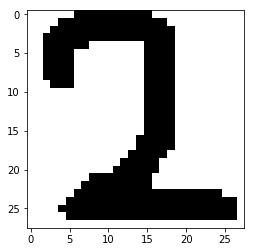

In [12]:
%matplotlib inline
image = Image.open('C:/Users/tashu/Desktop/Test Image.png')
imshow(image)

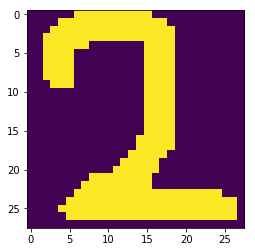

In [13]:
data = np.asarray(image, dtype="int32" )
gray=-(0.21*data[:,:,0]+0.72*data[:,:,1]+0.07*data[:,:,2])/255
imshow(gray)

In [14]:
Xnew = gray.reshape(1, 1, 28, 28).astype('float32')
# make a prediction
ynew = model.predict(Xnew)
print('The predicted value is:- '+str(np.argmax(ynew)))

The predicted value is:- 7


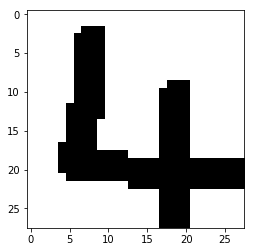

In [15]:
%matplotlib inline
image = Image.open('C:/Users/tashu/Desktop/Test Image 1.png')
imshow(image)

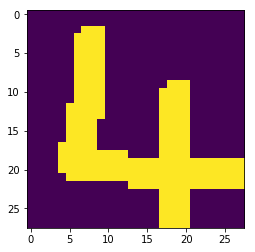

In [16]:
data = np.asarray(image, dtype="int32" )
gray=-(0.21*data[:,:,0]+0.72*data[:,:,1]+0.07*data[:,:,2])/255
imshow(gray)

In [17]:
Xnew = gray.reshape(1, 1, 28, 28).astype('float32')
# make a prediction
ynew = model.predict(Xnew)
print('The predicted value is:- '+str(np.argmax(ynew)))

The predicted value is:- 4


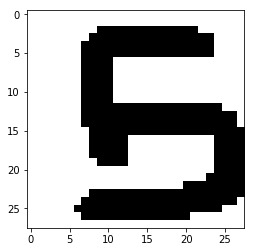

In [18]:
%matplotlib inline
image = Image.open('C:/Users/tashu/Desktop/Test Image 2.png')
imshow(image)

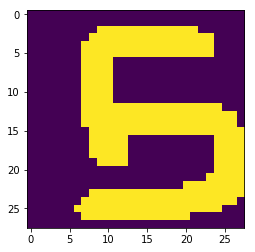

In [19]:
data = np.asarray(image, dtype="int32" )
gray=-(0.21*data[:,:,0]+0.72*data[:,:,1]+0.07*data[:,:,2])/255
imshow(gray)

In [20]:
Xnew = gray.reshape(1, 1, 28, 28).astype('float32')
# make a prediction
ynew = model.predict(Xnew)
print('The predicted value is:- '+str(np.argmax(ynew)))

The predicted value is:- 5


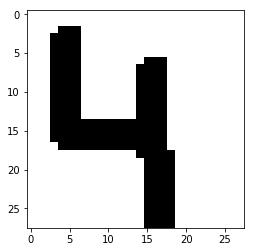

In [21]:
%matplotlib inline
image = Image.open('C:/Users/tashu/Desktop/Test Image 3.png')
imshow(image)

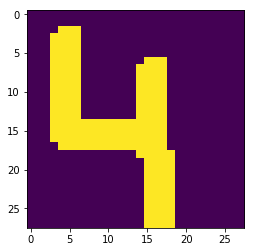

In [22]:
data = np.asarray(image, dtype="int32" )
gray=-(0.21*data[:,:,0]+0.72*data[:,:,1]+0.07*data[:,:,2])/255
imshow(gray)

In [23]:
Xnew = gray.reshape(1, 1, 28, 28).astype('float32')
# make a prediction
ynew = model.predict(Xnew)
print('The predicted value is:- '+str(np.argmax(ynew)))

The predicted value is:- 4


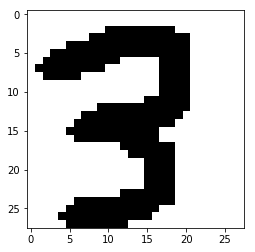

In [24]:
%matplotlib inline
image = Image.open('C:/Users/tashu/Desktop/Test Image 4.png')
imshow(image)

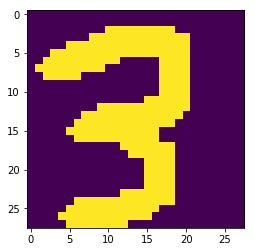

In [25]:
data = np.asarray(image, dtype="int32" )
gray=-(0.21*data[:,:,0]+0.72*data[:,:,1]+0.07*data[:,:,2])/255
imshow(gray)

In [26]:
Xnew = gray.reshape(1, 1, 28, 28).astype('float32')
print(np.shape(Xnew))
# make a prediction
ynew = model.predict(Xnew)
print('The predicted value is:- '+str(np.argmax(ynew)))

(1, 1, 28, 28)
The predicted value is:- 3
